In [3]:
!pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ----- ---------------------------------- 2.1/16.1 MB 10.7 MB/s eta 0:00:02
   ---------- ----------------------------- 4.2/16.1 MB 11.5 MB/s eta 0:00:02
   ---------------- ----------------------- 6.6/16.1 MB 10.9 MB/s eta 0:00:01
   ------------------ --------------------- 7.3/16.1 MB 10.8 MB/s eta 0:00:01
   ------------------ --------------------- 7.3/16.1 MB 10.8 MB/s eta 0:00:01
   -------------------- ------------------- 8.1/16.1 MB 6.7 MB/s eta 0:00:02
   ---------------------- ----------------- 9.2/16.1 MB 6.6 MB/s eta 0:00:02
   ------------------------ --------------- 10.0/16.1 MB 6.1 MB/s eta 0:00:01
   --------------------------- ------------ 11.0/16.1 MB 6.1 MB/s eta 0:00:01
   ------------------------------- -------- 12.6/16.1 MB 6.2 MB/s eta 0:00:01
   ----------------------------------- ---- 14.2/16.1 MB 6.4 MB/s eta 0:00


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 5.6 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.0 MB 9.5 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.0 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 9.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------------- - 2.1/2.2 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 9.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------------------------- -------- 2.1/2.6 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 9.5 MB/s eta 0:00:00


In [8]:
#importing mysql module in python
import mysql.connector as sq
import pandas as pd
#setting the host,user and database connection
conn = sq.connect(host="localhost", user="root", password="", database="terpbuy")


In [9]:
#Query of the quantity of items sold by each department#
q1 = "SELECT department.department_id,department.department_name,COUNT(product.product_id) AS `Number of products in the department` FROM `department` INNER JOIN `product` ON department.department_id=product.department_id GROUP BY department_name ORDER BY department_name"
frame = pd.read_sql(q1,conn)
frame

C:\Users\sarka\AppData\Local\Temp\ipykernel_108972\186533328.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  frame = pd.read_sql(q1,conn)


,department_id,department_name,Number of products in the department
0,4,Apparel,7
1,8,Book Shop,1
2,9,Discs Shop,4
3,7,Fan Shop,6
4,2,Fitness,7
5,3,Footwear,8
6,5,Golf,7
7,12,Health and Beauty,1
8,6,Outdoors,27
9,11,Pet Shop,1


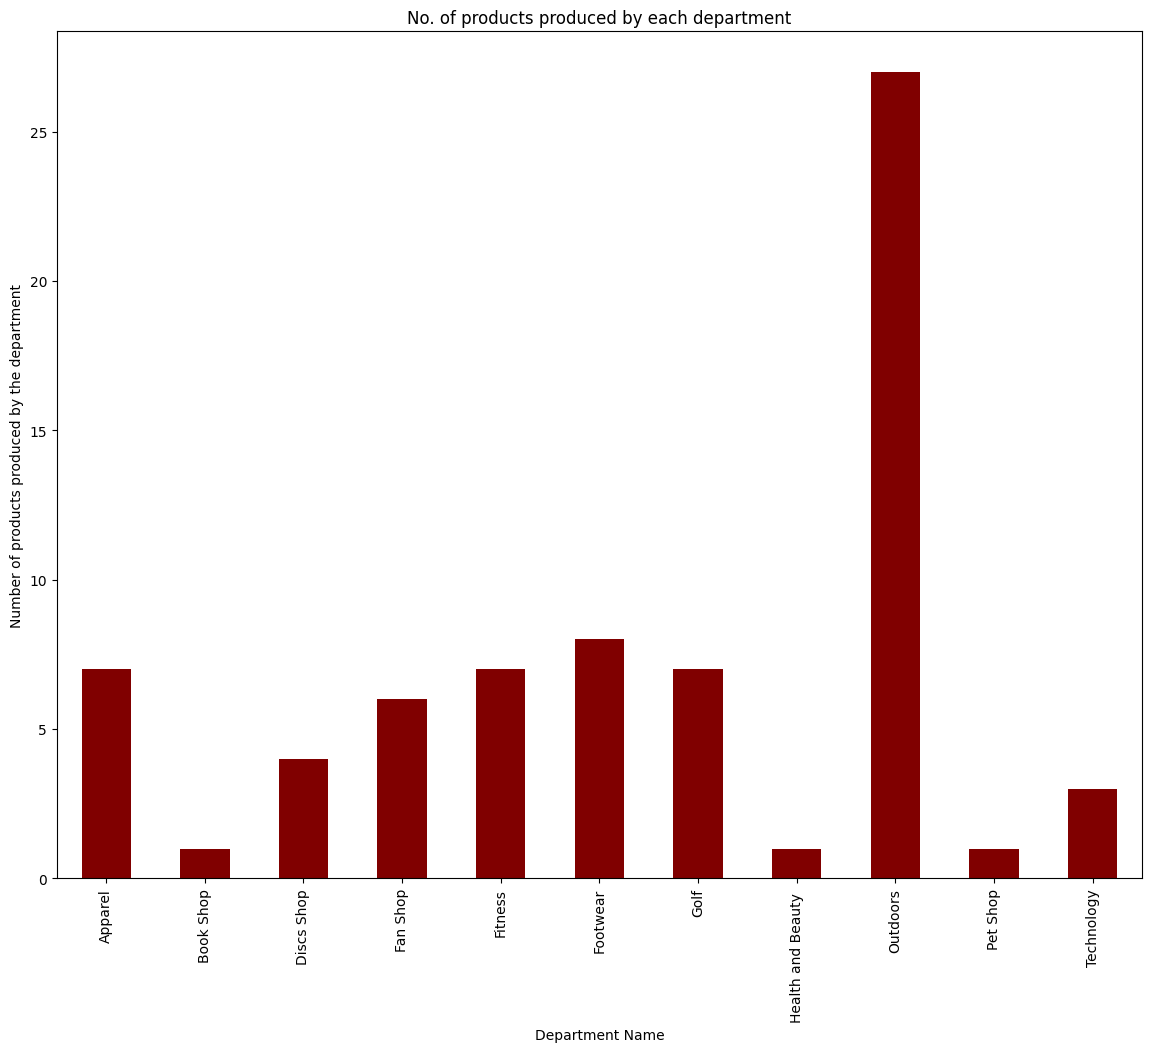

In [10]:
import matplotlib.pyplot as plt  
#Setting the index of the data frame of first query to the name of the department#
y0=frame.set_index('department_name')
#Initializing y axis as number of products in the department#
y=y0['Number of products in the department']
#Initializing x axis as the name of the department#
y.plot(kind='bar' , y = 'department_name' , figsize=(14,11), color='Maroon')
plt.xlabel("Department Name")
plt.ylabel("Number of products produced by the department")
plt.title("No. of products produced by each department")
plt.show()


We see that the 'Outdoors' department has the most number of products sold being 27 whereas the 'BookShop','Petshop' and 'Health and Beauty' department has the least number of products sold being 1. The departments selling more than 5 products but less than 10 products are 'Fan Shop', 'Fitness', 'Footwear', 'Golf' and 'Apparel'. The departments selling more than 1 but less than 5 products are 'Disco Shop' and 'Technology'

In [11]:
#Query of the no. of orders placed in a year#
q2 = "SELECT YEAR(order_date) AS `Year in which the order was placed`,COUNT(order_id) AS `No. of orders placed in a year` FROM `orders` GROUP BY YEAR(order_date)"
frame = pd.read_sql(q2,conn)
frame

C:\Users\sarka\AppData\Local\Temp\ipykernel_108972\1756724812.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  frame = pd.read_sql(q2,conn)


,Year in which the order was placed,No. of orders placed in a year
0,2018,585
1,2019,708
2,2020,497
3,2021,362


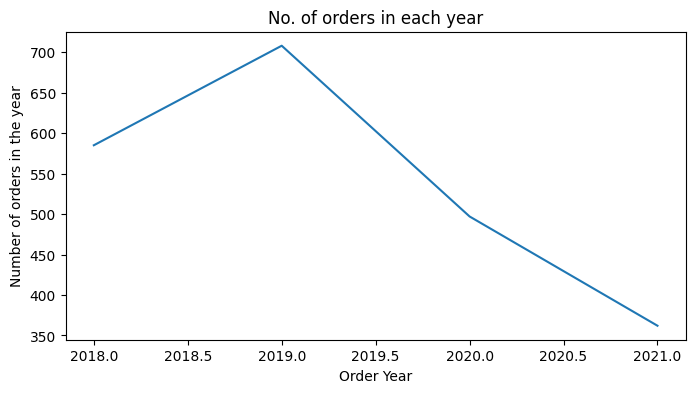

In [12]:
import matplotlib.pyplot as plt  
#Setting the index of the data frame of second query to year in which the order was placed#
y0=frame.set_index('Year in which the order was placed')
#Initializing y axis as the number of orders in the year#
y=y0['No. of orders placed in a year']
#Initializing x axis as the order year#
y.plot(kind='line' , y = 'Year in which the order was placed' , figsize=(8,4))
plt.xlabel("Order Year")
plt.ylabel("Number of orders in the year")
plt.title("No. of orders in each year")
plt.show()


Yes there is a trend in ordering. We see that the number of orders increased from 585 per year to 708 per year from 2018 to 2019 but from 2019 to 2021 we see that the number of orders decreased from 708 per year in 2019 to 362 per year in 2021. There was a sharper decrease from 708 orders per year in 2019 to 497 orders in 2020 than it was from 497 orders in 2020 to 362 orders in 2021. 